In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from imblearn.over_sampling import SMOTE

In [3]:
data = pd.read_csv("Desktop/StreamingHistory0.csv")

In [4]:
data.head()

,endTime,artistName,trackName,msPlayed
0,2019-07-27 04:13,Elton John,Honky Cat,13630
1,2019-07-27 04:13,New Riders of the Purple Sage,Panama Red,1300
2,2019-07-27 04:13,Tim Montana,Low Class,1940
3,2019-07-27 04:13,Shooter Jennings,Outlaw You,2395
4,2019-07-27 04:13,Jim Croce,Hey Tomorrow,16094


In [5]:
data = data.rename(columns={"artistName":"artist","endTime":"date","trackName":"track"})
data.head()

,date,artist,track,msPlayed
0,2019-07-27 04:13,Elton John,Honky Cat,13630
1,2019-07-27 04:13,New Riders of the Purple Sage,Panama Red,1300
2,2019-07-27 04:13,Tim Montana,Low Class,1940
3,2019-07-27 04:13,Shooter Jennings,Outlaw You,2395
4,2019-07-27 04:13,Jim Croce,Hey Tomorrow,16094


Text(0.5, 1.0, "Choosing what is a 'favorite' song")

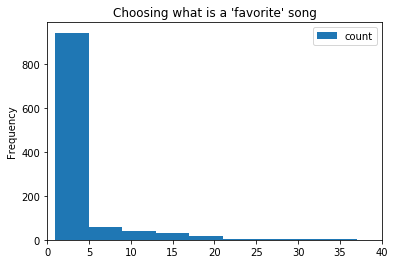

In [6]:

ax = data.groupby(['artist','track']).size().to_frame('count').reset_index().plot(kind='hist',bins=9)
ax.set_xlim(0,40)
ax.set_title("Choosing what is a 'favorite' song")

In [7]:

data = data.groupby(['artist','track']).size().to_frame('count').reset_index()
data = data[data['count']>=5]
# To display the top 5 rows
data.head()

,artist,track,count
1,3 Doors Down,Kryptonite,7
4,38 Special,Hold On Loosely,9
10,AC/DC,Back In Black,5
11,AC/DC,Highway to Hell,7
12,AC/DC,Thunderstruck,17


In [8]:
features = pd.read_csv("Desktop/SpotifyFeatures.csv")
features.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [9]:
features['same_artists'] = features.artist_name.isin(data.artist) 
features['same_track'] = features.track_name.isin(data.track) 
features["favorite"] = np.where((features["same_artists"] == True) & (features["same_track"] == True),1,0) # If both instances are True.
features = features.drop(["same_artists","same_track"],axis=1)

features

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,favorite
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,0
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,0
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,0
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,0
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962,0
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969,0
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813,0
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489,0


In [10]:
future = features.copy(deep=True)

In [11]:
features.genre.unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [12]:
features[features.genre == 'Comedy'].describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,favorite
count,9681.000000,9681.000000,9681.000000,9.681000e+03,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.0
mean,21.342630,0.793098,0.559038,2.353052e+05,0.676094,0.000574,0.724775,-11.689321,0.853532,98.235488,0.412764,0.0
std,8.428764,0.130313,0.089625,2.502539e+05,0.211705,0.009987,0.223437,4.777983,0.205918,27.839986,0.207258,0.0
min,0.000000,0.000363,0.239000,3.004000e+04,0.001410,0.000000,0.025800,-31.047000,0.023000,32.451000,0.023700,0.0
25%,15.000000,0.753000,0.499000,1.218800e+05,0.522000,0.000000,0.662000,-14.649000,0.888000,79.720000,0.252000,0.0
50%,20.000000,0.819000,0.561000,1.890570e+05,0.704000,0.000000,0.767000,-11.209000,0.928000,90.124000,0.410000,0.0
75%,26.000000,0.872000,0.620000,2.812930e+05,0.859000,0.000000,0.898000,-8.088000,0.944000,115.128000,0.561000,0.0
max,61.000000,0.995000,0.898000,5.552917e+06,0.998000,0.352000,0.996000,-0.255000,0.967000,207.157000,0.980000,0.0


In [13]:
features[features.genre == 'Movie'].describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,favorite
count,7806.000000,7806.000000,7806.000000,7.806000e+03,7806.000000,7806.000000,7806.000000,7806.000000,7806.000000,7806.000000,7806.000000,7806.0
mean,12.174097,0.697341,0.491186,2.104054e+05,0.370703,0.125427,0.228715,-12.952094,0.109400,113.946770,0.447808,0.0
std,13.613171,0.277379,0.178861,2.123862e+05,0.237548,0.281954,0.197256,5.635001,0.179151,30.346368,0.278910,0.0
min,0.000000,0.000014,0.065400,1.721300e+04,0.000216,0.000000,0.012100,-38.445000,0.022800,32.244000,0.000000,0.0
25%,1.000000,0.541000,0.352000,1.373632e+05,0.178000,0.000000,0.104000,-16.122250,0.035000,89.797500,0.203250,0.0
50%,7.000000,0.794000,0.503000,1.826130e+05,0.332500,0.000011,0.145000,-12.243000,0.043100,111.465000,0.410000,0.0
75%,20.000000,0.919000,0.630750,2.353532e+05,0.529000,0.007495,0.287000,-8.758750,0.076775,132.435500,0.678000,0.0
max,82.000000,0.996000,0.940000,3.832947e+06,0.995000,0.994000,0.988000,-1.828000,0.965000,232.602000,1.000000,0.0


In [14]:
features[features.genre == 'Jazz'].describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,favorite
count,9441.000000,9441.000000,9441.000000,9.441000e+03,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.0
mean,40.824383,0.499606,0.585638,2.656453e+05,0.472776,0.358009,0.173355,-11.210457,0.072304,111.783658,0.508961,0.0
std,9.588840,0.337637,0.158903,1.230979e+05,0.237807,0.383488,0.151554,4.622718,0.079359,29.343372,0.251218,0.0
min,0.000000,0.000001,0.059600,1.969300e+04,0.002110,0.000000,0.014600,-39.198000,0.022600,34.765000,0.026600,0.0
25%,35.000000,0.163000,0.475000,1.899580e+05,0.288000,0.000204,0.093800,-13.687000,0.035200,90.052000,0.301000,0.0
50%,40.000000,0.525000,0.602000,2.486270e+05,0.473000,0.133000,0.115000,-10.353000,0.043600,105.472000,0.513000,0.0
75%,46.000000,0.823000,0.705000,3.136930e+05,0.657000,0.801000,0.184000,-7.890000,0.066500,127.871000,0.712000,0.0
max,79.000000,0.996000,0.987000,4.497994e+06,0.999000,0.985000,0.986000,-1.002000,0.939000,239.848000,0.985000,0.0


In [15]:
# Removing 'songs' with these genres
features = features[features.genre!='Comedy']
# Track_id
features = features.drop(columns='track_id')

In [16]:
features = features.drop(columns='track_name')

In [17]:

features.head(5)

,genre,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,favorite
0,Movie,Henri Salvador,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,0
1,Movie,Martin & les fées,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,0
2,Movie,Joseph Williams,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,0
3,Movie,Henri Salvador,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,0
4,Movie,Fabien Nataf,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,0


In [18]:

# How the classes are imbalanced
features.favorite.value_counts()

0    222772
1       272
Name: favorite, dtype: int64

In [19]:
X = features.drop(columns=['favorite','genre','artist_name','key','mode','time_signature'])
y = features.favorite
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
X['favorite'] = y
X.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,favorite
0,0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,0.0525,166.969,0.814,0
1,1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,0.0868,174.003,0.816,0
2,3,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,0.0362,99.488,0.368,0
3,0,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,0.0395,171.758,0.227,0
4,4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,0.0456,140.576,0.390,0


In [20]:
X.favorite.value_counts()

1    222772
0    222772
Name: favorite, dtype: int64

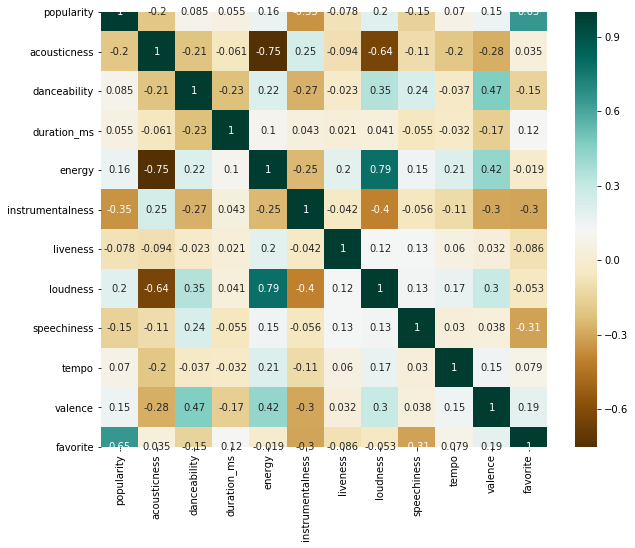

In [21]:

# Correlation Matrix of quantitative features
plt.figure(figsize=(10,8))
c = X.corr()
corr = sns.heatmap(c,cmap="BrBG",annot=True)

In [22]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
from sklearn.metrics import f1_score
# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier

In [23]:
# Train / Split Data
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns='favorite'), X.favorite,test_size = .20)

In [24]:

%%time
# Logistic Regression
lr = LogisticRegression()
lr_scores = cross_val_score(lr, X_train, y_train, cv=10, scoring="f1")
np.mean(lr_scores)

CPU times: user 32.2 s, sys: 493 ms, total: 32.7 s
Wall time: 8.19 s


0.7656125238744308

In [ ]:

# Hyperparameter optimization for Decision Tree Classifier
parameters = {
    'max_depth':[15,20,30],
}
dtc = Pipeline([('CV',GridSearchCV(DecisionTreeClassifier(), parameters, cv = 5))])
dtc.fit(X_train, y_train)
dtc.named_steps['CV'].best_params_

In [ ]:
%%time
# Decision Tree
dt = DecisionTreeClassifier(max_depth=30)
dt_scores = cross_val_score(dt, X_train, y_train, cv=10, scoring="f1")
np.mean(dt_scores)

In [ ]:

# Hyperparameter optimization of RandomForestClassifier
parameters = {
    'max_depth':[6,12,15,20],
    'n_estimators':[20,30]
}
clf = Pipeline([('CV',GridSearchCV(RandomForestClassifier(), parameters, cv = 5))])
clf.fit(X_train, y_train)
clf.named_steps['CV'].best_params_

In [ ]:

%%time
# Cross-validation for RandomForestClassifier
rf = Pipeline([('rf', RandomForestClassifier(n_estimators = 20, max_depth = 30))])
rf_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring="f1")
np.mean(rf_scores)

In [ ]:

# Hyperparameter optimization for Decision Tree Classifier
parameters = {
    'max_depth':[30],
}
dtc = Pipeline([('CV',GridSearchCV(DecisionTreeClassifier(), parameters, cv = 5))])
dtc.fit(X_train, y_train)
dtc.named_steps['CV'].best_params_

In [25]:
%%time
# Decision Tree
dt = DecisionTreeClassifier(max_depth=30)
dt.fit(X_train, y_train)
dt_scores = cross_val_score(dt, X_train, y_train, cv=10, scoring="f1")
np.mean(dt_scores)

CPU times: user 57.6 s, sys: 400 ms, total: 58 s
Wall time: 50.3 s


0.9945496571389205

In [26]:
prediction = dt.predict(future.drop(columns=['track_name','track_id','favorite','genre','artist_name','key','time_signature','mode']))

In [27]:
future['prediction'] = prediction

In [28]:
future = future[(future['favorite']==0) & (future['prediction'] == 1)]

In [29]:
future = future.drop(columns=['track_id','energy','duration_ms','acousticness','key','liveness','loudness','mode','danceability','tempo','time_signature','valence'])

In [30]:
future

,genre,artist_name,track_name,popularity,instrumentalness,speechiness,favorite,prediction
164,R&B,PARTYNEXTDOOR,Wus Good / Curious,67,0.000127,0.0790,0,1
222,R&B,James Blake,Are You In Love?,65,0.000022,0.0427,0,1
234,R&B,James Blake,Power On,65,0.007060,0.0447,0,1
682,Alternative,Red Hot Chili Peppers,Under the Bridge,78,0.000105,0.0459,0,1
1060,Country,Taj Mahal,Diving Duck Blues,55,0.000002,0.0372,0,1
...,...,...,...,...,...,...,...,...
228133,Soul,John Legend,All of Me - Live from Spotify Milan,59,0.000000,0.0439,0,1
228184,Soul,Slum Sociable,Do Something About It,56,0.002220,0.0468,0,1
228206,Soul,Natalie Cole,Bachata Rosa,60,0.000002,0.0305,0,1
228230,Soul,Kevin Morby,City Music,56,0.151000,0.0336,0,1


In [31]:
# Saving csv
future.to_csv("recommendations.csv")